In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import cv2 

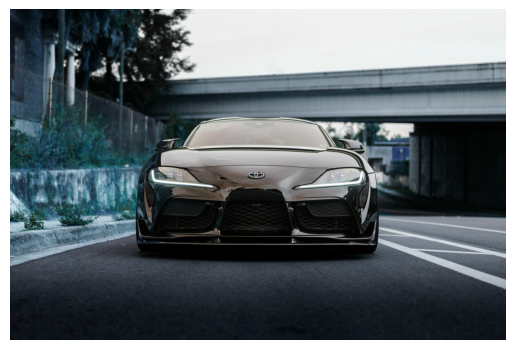

In [15]:
sp_img = cv2.imread("./supra.jpg")

plt.axis("off")
plt.imshow(sp_img)

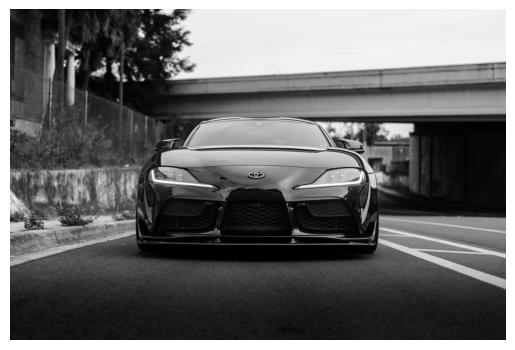

In [16]:
# convert it into a graysclae
gray_sp_image = cv2.imread("./supra.jpg", 0)

plt.axis("off")
plt.imshow(gray_sp_image, cmap='gray')

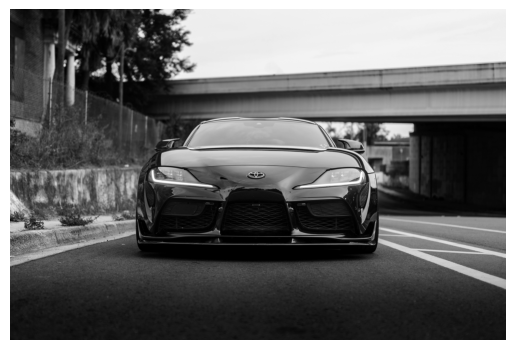

In [3]:
# we can also do this by just using the numpy 

def img_to_gray(img):
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]

    gray = 0.299 * R + 0.587 * G + 0.114 * B
    return gray

sp_img = mimage.imread("./supra.jpg")
# np array of img
# print(sp_img) 

grayed_supra = img_to_gray(sp_img)
plt.axis("off")
plt.imshow(grayed_supra, cmap='gray')

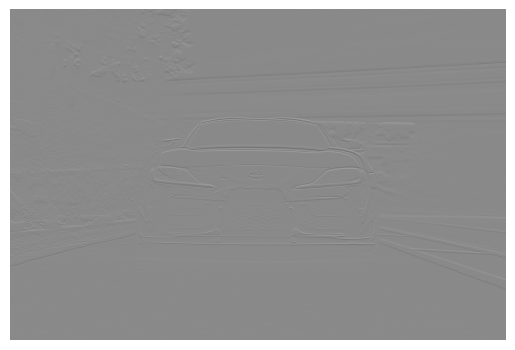

In [6]:
# Applying Edge detetion (sobel filter) using cv2
edge_x = cv2.Sobel(grayed_supra, cv2.CV_64F, 1, 0, ksize=3)
edge_y = cv2.Sobel(grayed_supra, cv2.CV_64F, 0, 1, ksize=3)

plt.axis("off")
plt.imshow(edge_x, cmap="gray")
plt.imshow(edge_y, cmap="gray")



In [ ]:
## this is not well optimised so it will take some time 
# Load the image and convert to grayscale
image = cv2.imread('./supra.jpg', 0)

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])

# Function to apply convolution
def convolve(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad = kh // 2  # Padding to keep image size same
    
    # Pad the image with zeros (to handle edges)
    padded_image = np.pad(image, pad, mode='constant')

    # Output array
    output = np.zeros_like(image)

    # Apply convolution
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output

# Apply Sobel filters
edge_x = convolve(image, sobel_x)
edge_y = convolve(image, sobel_y)

# Compute the gradient magnitude
edges = np.sqrt(edge_x**2 + edge_y**2)
edges = (edges / edges.max()) * 255  # Normalize to 0-255

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(edge_x, cmap='gray'), plt.title("Sobel X")
plt.subplot(1,3,3), plt.imshow(edge_y, cmap='gray'), plt.title("Sobel Y")
plt.figure()
plt.imshow(edges, cmap='gray'), plt.title("Edge Detection (Sobel)")
plt.show()


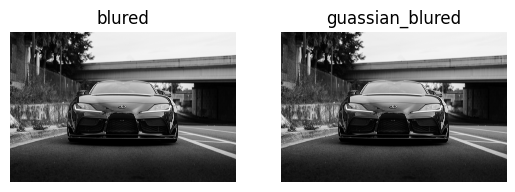

In [5]:
# Apply blue and gaussian blur

blured_supra = cv2.blur(grayed_supra, (5,5))
guassian_blured_supra = cv2.GaussianBlur(grayed_supra, (5,5), 0)


plt.subplot(1,2,1), plt.imshow(blured_supra, cmap='gray'), plt.title("blured"),plt.axis("off")
plt.subplot(1,2,2), plt.imshow(guassian_blured_supra, cmap='gray'), plt.title("guassian_blured"),plt.axis("off")
plt.show()


(<Axes: title={'center': 'Inverted'}>,
 Text(0.5, 1.0, 'Inverted'),
 (np.float64(-0.5), np.float64(6090.5), np.float64(4060.5), np.float64(-0.5)))

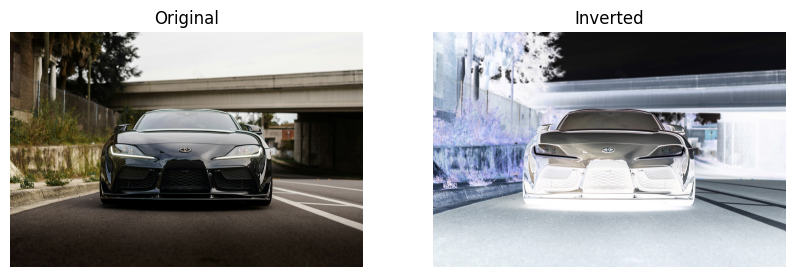

In [8]:
# Invert the image color
img = cv2.imread('./supra.jpg', 1)
 
inverted_colors = 255 - img

# conver the BGR to RGB to see on the matplotlib
inverted_colors = cv2.cvtColor(inverted_colors, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original"),plt.axis("off")
plt.subplot(1,2,2), plt.imshow(inverted_colors), plt.title("Inverted"), plt.axis("off")